In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
import transformers
import bitsandbytes as bnb
import networkx as nx

random_state = 1

In [2]:
def euclid(list1, list2):
    return sum((p-q)**2 for p, q in zip(list1, list2)) ** .5

In [3]:
with open('df_annotations_embeddings.pkl', 'rb') as f:
    df = pickle.load(f)
df

,Document,Split,Name,Id,Text,Type,Scheme,embeddings
0,A2008_Commission of the European Communities v...,1,prem,A1,must held first Article 4c CS prohibits granti...,L,Rule,"[-0.01507568359375, -1.73828125, 1.4287109375,..."
1,A2008_Commission of the European Communities v...,1,prem,A2,Also clear consistent caselaw Articles 4 CS 67...,L,"[Itpr, Prec, Rule]","[0.93017578125, -1.0146484375, 0.0575256347656..."
2,A2008_Commission of the European Communities v...,1,prem,A3,Court deduces Article 67 CS covers general mea...,L,"[Prec, Rule]","[0.195556640625, -1.734375, -0.1546630859375, ..."
3,A2008_Commission of the European Communities v...,1,prem,A4,Court also held action taken Article 67 CS can...,L,"[Prec, Rule]","[0.404296875, -0.2352294921875, 0.34326171875,..."
4,A2008_Commission of the European Communities v...,1,prem,A5,Court held particular inconceivable authors EC...,L,"[Itpr, Prec, Rule]","[1.0849609375, -0.98828125, 0.39453125, 0.8774..."
...,...,...,...,...,...,...,...,...
2530,R2021_World Duty Free v,5,prem,H7,question matter dialogue Spanish authorities C...,F,NaN,"[2.109375, -1.3642578125, -0.62744140625, 2.50..."
2531,R2021_World Duty Free v,5,prem,H8,present case action first instance WDFG compla...,F,NaN,"[0.880859375, -0.65966796875, -0.67626953125, ..."
2532,R2021_World Duty Free v,5,prem,H9,regard General Court recalled paragraph 212 ju...,F,NaN,"[2.0234375, -1.150390625, -0.70947265625, 1.59..."
2533,R2021_World Duty Free v,5,prem,H10,General Court err law concluding therefrom par...,F,NaN,"[1.6494140625, -1.5732421875, -0.857421875, 1...."


In [55]:
def contains_str(value, string):
    return string in value

In [58]:
df_train = df[df['Split'] != 2]
df_train = df_train.dropna(subset = ['Scheme'])
df_train = df_train[df_train['Scheme'].apply(lambda x: contains_str(x, 'Aut'))]
print(len(df_train))
df_train


49


,Document,Split,Name,Id,Text,Type,Scheme,embeddings
316,A2013_European Commission v Ireland and Others,3,prem,A9,Yet submitted Commission stated Advocate Gener...,F,Aut,"[1.9296875, -0.994140625, -1.013671875, 1.4736..."
402,A2016_European Commission v Aer Lingus Ltd and...,3,prem,A6,Advocate General observed essence point 41 Opi...,F,Aut,"[1.861328125, -0.7568359375, 0.1915283203125, ..."
435,A2016_European Commission v Aer Lingus Ltd and...,3,prem,D11,follows Advocate General observed essence poin...,L,"[Aut, Itpr]","[0.7578125, -1.0390625, -0.47314453125, 0.9809..."
520,A2016_European_Commission_v_World_Duty_Free,4,prem,B1,regards caselaw relating aid exports relied co...,"[F, L]","[Aut, Itpr, Prec]","[0.56640625, -0.97802734375, -0.8818359375, 0...."
524,A2016_European_Commission_v_World_Duty_Free,4,prem,B5,observed essence Advocate General points 133 1...,L,Aut,"[1.6123046875, -0.6708984375, -0.1895751953125..."
569,A2017_European Commission v Italian Republic_DT,4,prem,A10,addition Advocate General stated point 38 opin...,F,Aut,"[1.5224609375, -0.841796875, -0.388427734375, ..."
609,A2017_European Commission v Italian Republic_DT,4,prem,B37,apparent paragraphs 46 52 observed essence Adv...,L,"[Aut, Itpr]","[1.330078125, -0.74267578125, 0.00800323486328..."
755,A2018_Dirk Andres v European Commission,5,prem,A13,also noted essence Advocate General points 57 ...,"[F, L]","[Aut, Prec, Rule]","[1.1591796875, -0.7392578125, -0.53076171875, ..."
798,A2018_Dirk Andres v European Commission,5,prem,C22,Consequently also noted essence Advocate Gener...,L,Aut,"[1.205078125, -0.26904296875, -0.316650390625,..."
809,A2018_Dirk Andres v European Commission,5,prem,C22|C23|C32,also noted essence Advocate General point 109 ...,L,"[Aut, Itpr]","[1.5673828125, 0.0211334228515625, -0.61865234..."


In [59]:
distances = []
for j in range(len(df_train)):
    newlist = []
    for i in range(len(df_train)):
        newlist.append(euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']))
    distances.append(newlist)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


(48*10)**.5 = 21.909


In [131]:
closenodes = []
for el in distances:
    count = 0
    for newel in el:
        if newel <= 29.65:      #set manually, with 44.27 on average the extracted subgraph has (N*10)**0.5 nodes, with 27.97 the nodes are connected to 1% of other nodes
                                # with 38.51, half nodes                                                                 with 25.78   .5% other nodes
                                # with 61.53 ì, double nodes                                                               with 29.65   2% other nodes
            count += 1
    closenodes.append(count)

print(sum(closenodes)/len(closenodes))  #average size of extracted subgraph

1.9795918367346939


In [132]:
Training_graph = nx.Graph() #Resoluti

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 27.97:      #così in media ogni nodo è collegato all'1%
            Training_graph.add_edge(i,j)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48


In [133]:
pickle.dump(Training_graph, open('task3_Aut_.01.pickle', 'wb'))


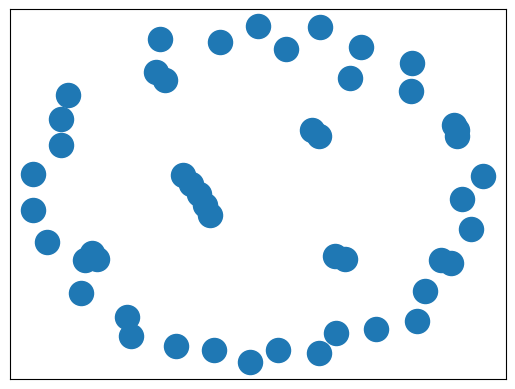

In [134]:
nx.draw_networkx(Training_graph, with_labels = False)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48


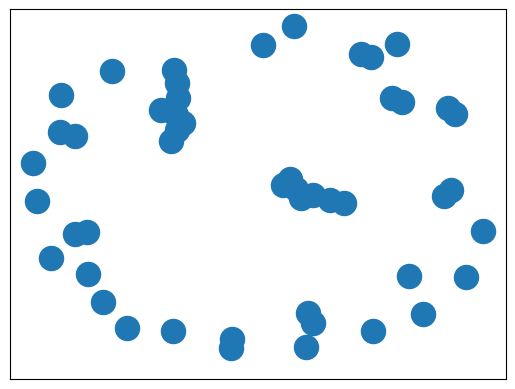

In [135]:
Training_graph = nx.Graph() #Resoluti

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 29.65:      #così in media ogni nodo è collegato al 2%
            Training_graph.add_edge(i,j)
pickle.dump(Training_graph, open('task3_Aut_.02.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)

adding node 0
adding node 1
adding node 2
adding node 3
adding node 4
adding node 5
adding node 6
adding node 7
adding node 8
adding node 9
adding node 10
adding node 11
adding node 12
adding node 13
adding node 14
adding node 15
adding node 16
adding node 17
adding node 18
adding node 19
adding node 20
adding node 21
adding node 22
adding node 23
adding node 24
adding node 25
adding node 26
adding node 27
adding node 28
adding node 29
adding node 30
adding node 31
adding node 32
adding node 33
adding node 34
adding node 35
adding node 36
adding node 37
adding node 38
adding node 39
adding node 40
adding node 41
adding node 42
adding node 43
adding node 44
adding node 45
adding node 46
adding node 47
adding node 48


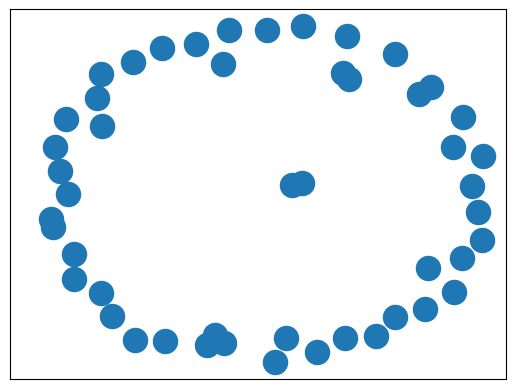

In [136]:
Training_graph = nx.Graph() #Resoluti

for i in range(len(df_train)):
    print('adding node',i)
    Training_graph.add_node(i)
    for j in range(i):
        if euclid(df_train.iloc[j]['embeddings'], df_train.iloc[i]['embeddings']) <= 25.78:      #così in media ogni nodo è collegato al .5%
            Training_graph.add_edge(i,j)
pickle.dump(Training_graph, open('task3_Aut_.005.pickle', 'wb'))
nx.draw_networkx(Training_graph, with_labels = False)